# Fonis Datageeks
## Wokshop: Intro to Machine Learning: Classification and Regression
### Domaći zadatak 3: Opisati kod za vizualizaciju modela sa opisom korišćenih funkcija

`import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()`

***

**Dodati code cellove sa rešenjem nakon svakog pitanja.**

***

1. Prava prilika da jednim zadatkom obnoviš znanje sa prve i druge radionice, pritom malo pročitaš dokumentaciju i skapiraš vizualizaciju modela. Do petka napravi notebook sa ovim kodom, opisom svake funkcije koja se poziva i objašnjenjem kako je i šta je kreirano. Pošalji mi to i brzo odgovaram. :D

In [3]:
#importujemo sve potrebne biblioteke
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
%matplotlib inline


#isključujemo upozorenja
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

#učitavamo podatke za klasifikaciju sa GitHub-a putem URL-a
df = pd.read_csv('https://raw.githubusercontent.com/markostalma/DataGeeks/master/Social_Network_Ads.csv')
#Gledamo prvih nekoliko redova iz CSV fajla koji smo prethodno učitali
df.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
# Uz pomoć info komande vidimo da imamo četiri stotine entiteta odnosno redova i pet kolona sa atributima, 
# gde je Purchased klasni atribut kao i da imamo tri različite vrste podataka dva numerička i jedan kategorički za pol.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


In [15]:
# Malo deskriptivne statistike za kolone koje se tiču zarade i kupovine proizvoda 
df[['EstimatedSalary', 'Purchased']].describe()
#Prosečna zarada je 69.742,50 dok je maksimalna 150.000 i minimalna 15.000

,EstimatedSalary,Purchased
count,400.000000,400.000000
mean,69742.500000,0.357500
std,34096.960282,0.479864
min,15000.000000,0.000000
25%,43000.000000,0.000000
50%,70000.000000,0.000000
75%,88000.000000,1.000000
max,150000.000000,1.000000


In [6]:
# Kompletan izveštaj od podacima koje koristimo
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,400
Total Missing (%),0.0%
Total size in memory,15.7 KiB
Average record size in memory,40.2 B
Numeric,3
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [25]:
# Kao i za pol koji je kategorički atribut uz pomoć "include=['object']" opcije unutar "describe" funkcije.
df[['Gender']].describe(include=['object'])
# Gde vidimo da ima skoro pojednako i žena (204) i muškaraca (196).

,Gender
count,400
unique,2
top,Female
freq,204


In [33]:
# Uključujemo i pivot tabele kako bi smo uporedili pojedine atribute. 
df.pivot_table(['EstimatedSalary', 'Age'],
               ['Purchased', 'Gender'], aggfunc='mean')
# Vidimo da je prosečna starost onih koji ne kupuju oko 32-32 godine, 
# dok kupuju stariji sa prosekom za žene oko 47 godina i za muškarce oo 45.5 godina koji imaju veća primanja.

Age  EstimatedSalary
Purchased Gender                            
0         Female  33.110236     61480.314961
          Male    32.484615     59630.769231
1         Female  47.155844     88714.285714
          Male    45.500000     83424.242424

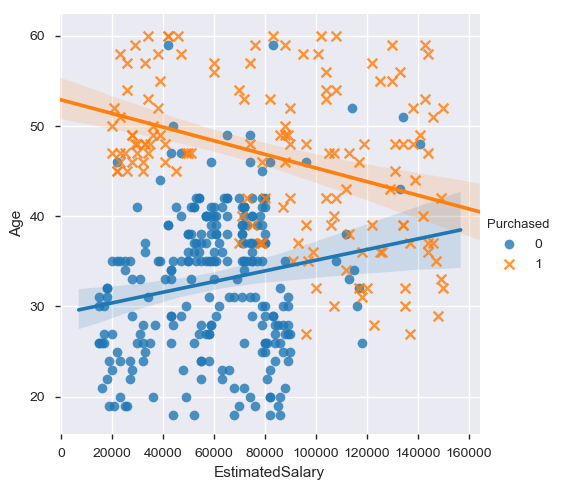

In [13]:
# Pravimo plot gde se vidi da najčešće proizvod kupuju stariji sa većom platom, 
# kao i da kupuju i mlađi koji imaju visoka primanja
sns.lmplot('EstimatedSalary', 'Age', data=df, hue='Purchased',  markers=["o", "x"])

In [7]:
# Imamo oko 64.25% onih koji nisu ništa kupili i oko 35.75% onih koji su kupili naš proizvod
df['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [8]:
# Zatim predviđamo na osnovu godina i visine primanja
X = df.iloc[:, [2, 3]].values 
y = df.iloc[:, 4].values
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


In [9]:
# Učitavamo sklearn klasu za podelu na trening i test i biramo veličinu skupa za test na 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
# Učitavamo sklearn klasu za algoritam stabla odlučivanja
# podešavamo entropiju kao kriterijum rasuđivanja 
# i maksimalnu dubinu stabla stavljamo na tri, zatim pravimo model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3 )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

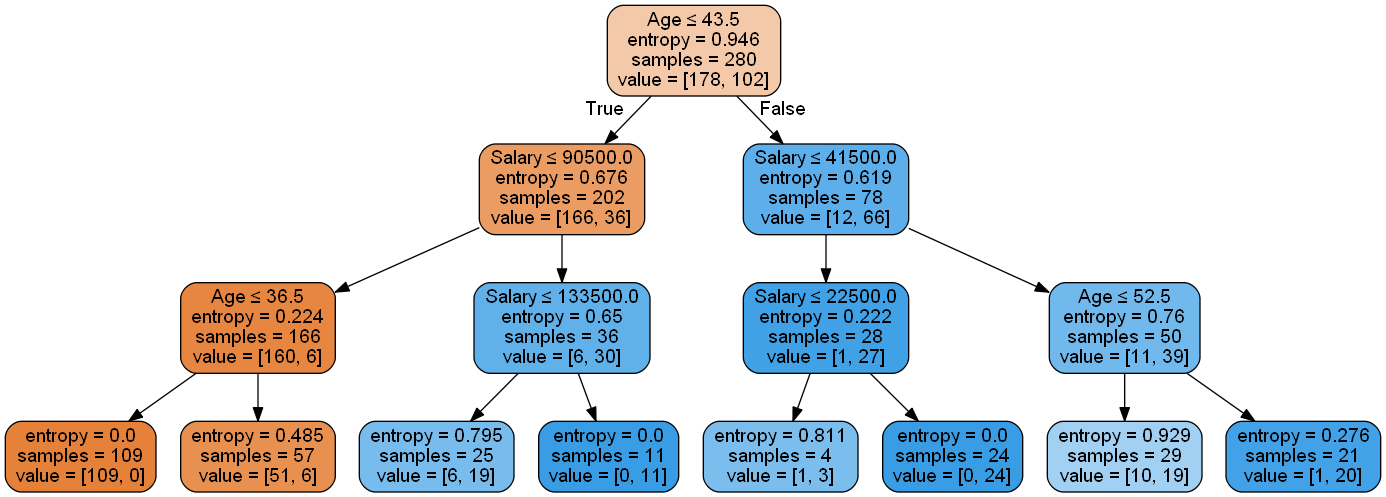

In [14]:
# Učitavamo potrebne klase kako mi mogli da vizualizujemo naš prediktivni model
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['Age', 'Salary'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
# Proveravamo korisnika (u ovom slučaju korisnika iz 72 reda) sa njegovim podacima
df.iloc[72, :]

User ID            15595228
Gender               Female
Age                      20
EstimatedSalary       23000
Purchased                 0
Name: 72, dtype: object

In [64]:
# Pravimo predikciju za test podatke i prikazujemo prvih deset
predictions = classifier.predict(X_test)
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [65]:
# Prikazujemo predikciju za ceo test set podataka
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [72]:
# Učitavamo metrike iz Sklearn biblioteke (matricu konfuzije i klasifikacioni izveštaj - koji ćemo kasnije koristiti)
# kako bi napravili evulaciju modela
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[72,  7],
       [ 3, 38]], dtype=int64)

In [59]:
# Ponovljena matrica konfuzije na drugačiji način
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp
# tn = True Negative 
# fp = False Positive
# fn = False Negative
# tp = True Positive

(72, 7, 3, 38)

In [73]:
# Koristimo klasifikacioni izveštaj koji smo prethodno učitali kako bi videli potrebne metrike evulacije modela
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        79
           1       0.84      0.93      0.88        41

   micro avg       0.92      0.92      0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



In [75]:
# Precision = tp / (tp+fp) - koliko se negativnih slučajeva nađe među pozitivnim
# Recall = tp / (tp+fn) - koliko pozitivnih slučajeva nije klasifikovano među iste
# F1-score - 2 *(Recall * Precision) / (Recall * Precision) - uzima i lažne pozitivne i lažne negativne slučajeve

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


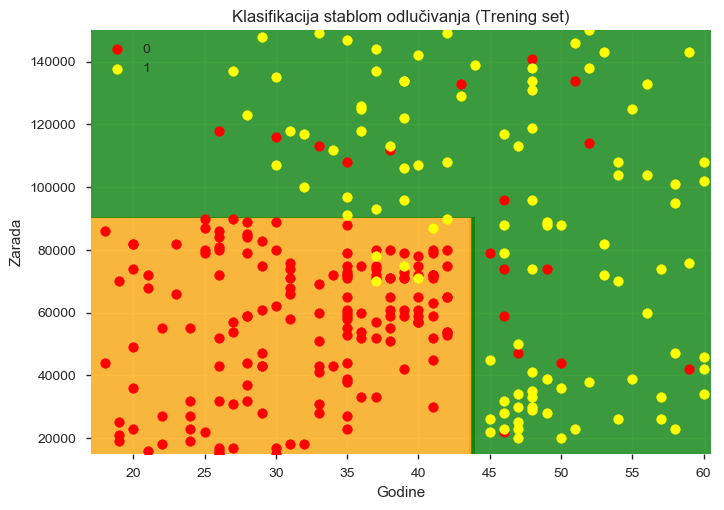

In [11]:
# Vizualizacija rezultata modela za trening test ( korišćene funkcije i opcije su opisane pri dnu dokumenta)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
    
plt.title('Klasifikacija stablom odlučivanja (Trening set)')
plt.xlabel('Godine')
plt.ylabel('Zarada')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


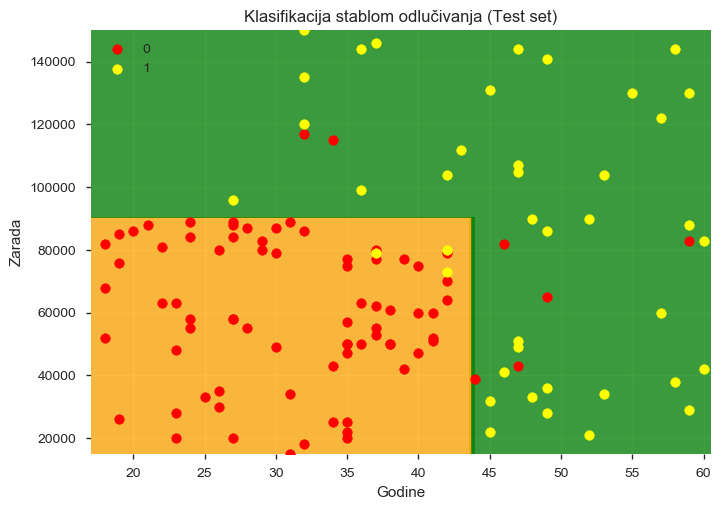

In [12]:
# Isto to radimo i za test set podataka
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
    
plt.title('Klasifikacija stablom odlučivanja (Test set)')
plt.xlabel('Godine')
plt.ylabel('Zarada')
plt.legend()
plt.show()

Ispisati i objasniti funkcije

**np.meshgrid** - vraća koordinatne matrice iz koordinatnih vektora.<br>
**np.arange([start,] stop[, step,][, dtype])** - vraća niz sa pravilno raspoređenim elementima po zadatom intervalu.<br>
**plt.contourf** - crta konture linija odnosno preseka i ispunjava ih bojom koja oznaćava pripadajuću klasu.<br>
    **predict** - predikcija po istreniranom modelu ( u našem slučaju to je **classifier**).<br>
    **alpha** - Providnost odnosno transparentnost zadate boje u procentima.<br>
    **cmap = ListedColormap** - biranje boja za podatke.<br> 
**plt.xlim() & plt.xlim()** - služe da predstave granice našeg plota.<br>
**np.unique** - pronalazi jedinstvene (unikatne) elemente niza i vraća ih razvrstane.<br>
**plt.scatter** - skater plot X i Y ose, sa promenljivom veličinom markera i bojom.<br>
**plt.title()** - dodajte naslov plotu.<br>
**plt.xlabel()** - dodaje naslov X osi.<br>
**plt.ylabel()** - dodaje naslov Y osi.<br>
**plt.legend()** - štampa legendu unutar plota.<br>
**plt.show()** - prikazuje naš plot.<br>


***

Korisni linkovi:

1. [np.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)<br>
2. [np.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)<br>
3. [plt.contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html)<br>
4. [predict](https://scikit-learn.org/stable/modules/generated/sklearn.svm.libsvm.predict.html)<br>
5. [cmap = ListedColormap](https://matplotlib.org/users/colormaps.html)<br>
6. [plt.xlim() & plt.xlim()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html)<br>
7. [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html)<br>
8. [plt.scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)